In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()


In [5]:
# Normalize
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Reshape
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [7]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

datagen.fit(X_train)


In [9]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [13]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=5,
    validation_data=(X_test, y_test)
)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 52ms/step - accuracy: 0.8968 - loss: 0.3205 - val_accuracy: 0.9888 - val_loss: 0.0327
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 54ms/step - accuracy: 0.9716 - loss: 0.0964 - val_accuracy: 0.9909 - val_loss: 0.0257
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 59ms/step - accuracy: 0.9786 - loss: 0.0706 - val_accuracy: 0.9890 - val_loss: 0.0318
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 49s 52ms/step - accuracy: 0.9812 - loss: 0.0609 - val_accuracy: 0.9917 - val_loss: 0.0260
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 54ms/step - accuracy: 0.9840 - loss: 0.0539 - val_accuracy: 0.9932 - val_loss: 0.0230


In [15]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9932 - loss: 0.0230
Test Accuracy: 0.9932000041007996


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


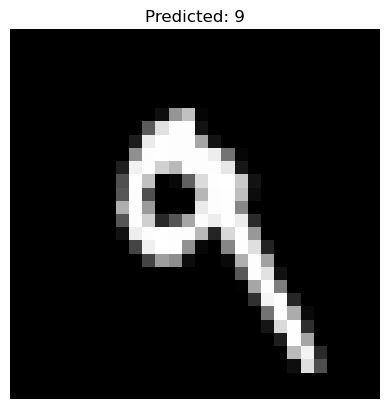

In [17]:
prediction = model.predict(X_test)

index = 7
plt.imshow(X_test[index].reshape(28,28), cmap='gray')
plt.title(f"Predicted: {np.argmax(prediction[index])}")
plt.axis('off')
plt.show()
